# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

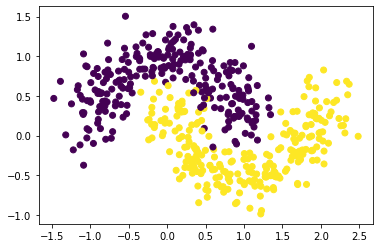

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [34]:
from mlxtend.plotting import plot_decision_regions

def plot_decisions(clf, X, y, title="model"):
    plt.figure(figsize=(12, 10))
    clf.fit(X, y)
    
    plot_decision_regions(X, y, clf=clf)
    
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.title('decision regions for {}'.format(title))
    plt.show()

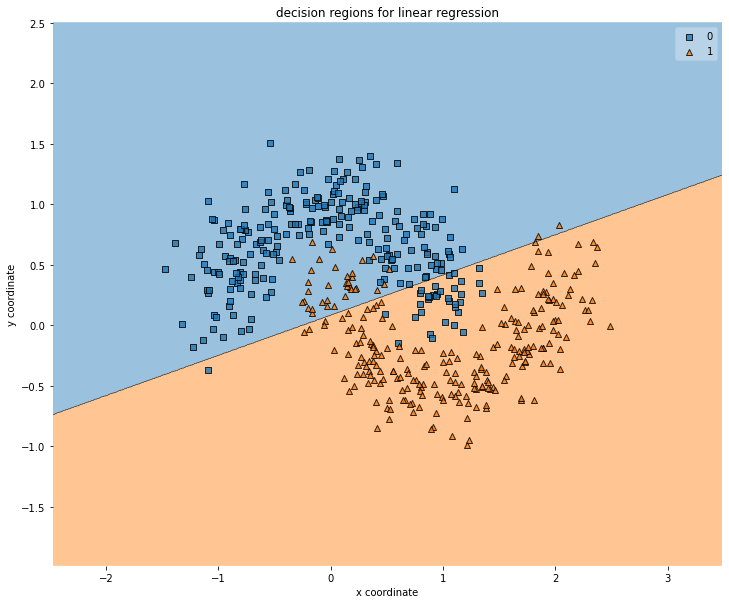

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr = LogisticRegression(penalty='l2', C=0.5) # add some params

plot_decisions(lr, moons_points, moons_labels, "linear regression")

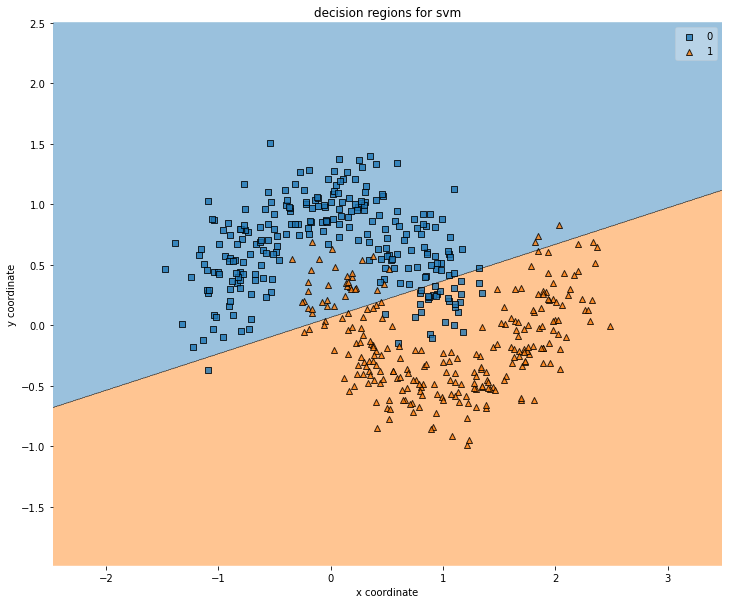

In [36]:
svm = SVC(kernel='linear', C=2) # here too

plot_decisions(svm, moons_points, moons_labels, "svm")

Зависимость от параметров в данном примере нелинейная, соответственно линейные модели не могут с этим справиться

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

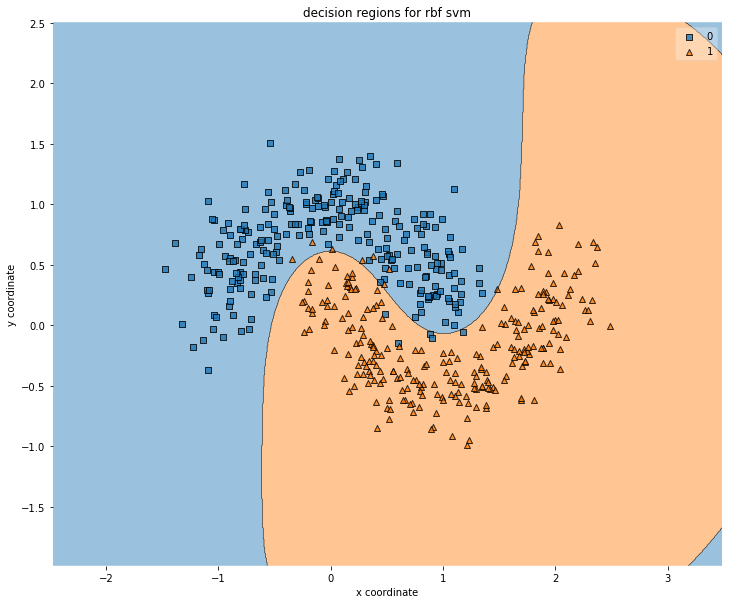

In [37]:
svm = SVC(kernel='rbf', C=2)
plot_decisions(svm, moons_points, moons_labels, "rbf svm")

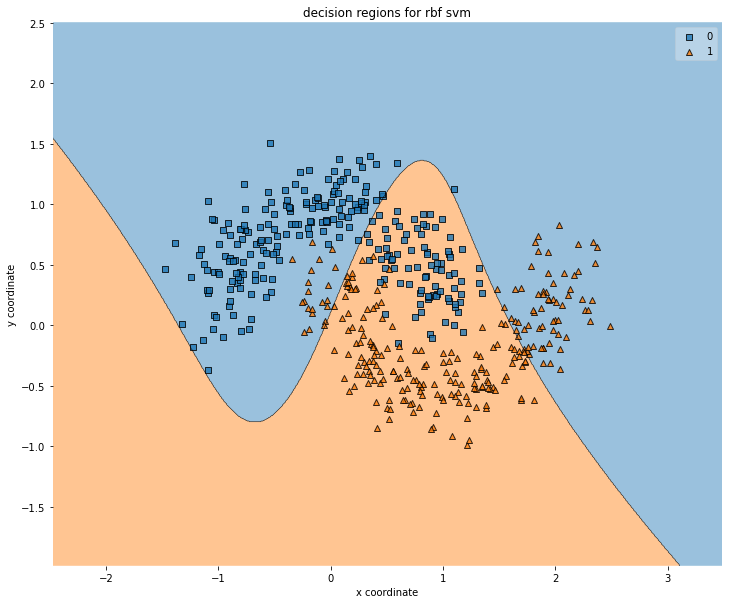

In [38]:
svm = SVC(kernel='sigmoid')
plot_decisions(svm, moons_points, moons_labels, "rbf svm")

Сигмоида не очень подходит для данного примера так как минимум интуитивно график должен иметь 3 "экстремума", а сигмоида "может позволить" тольк 2 (неформальное наблюдения, основанное на нескольких экспериментах)

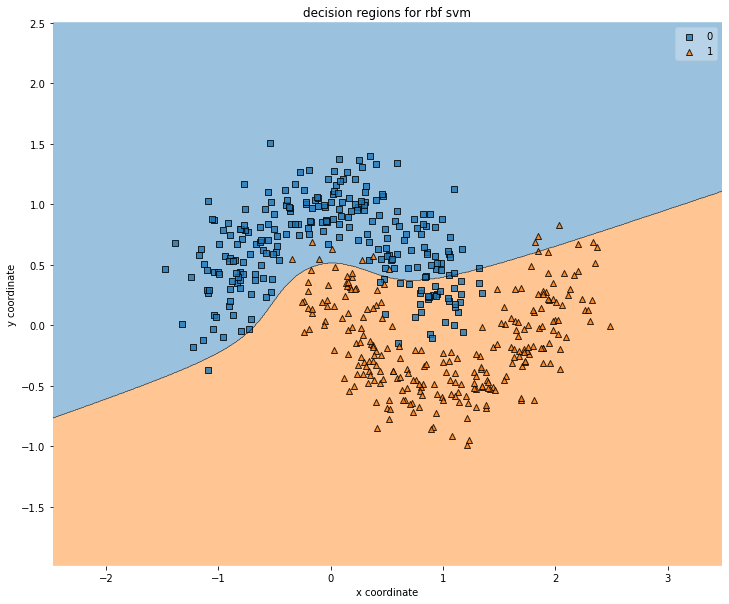

In [39]:
svm = SVC(kernel='poly', degree=3)
plot_decisions(svm, moons_points, moons_labels, "rbf svm")

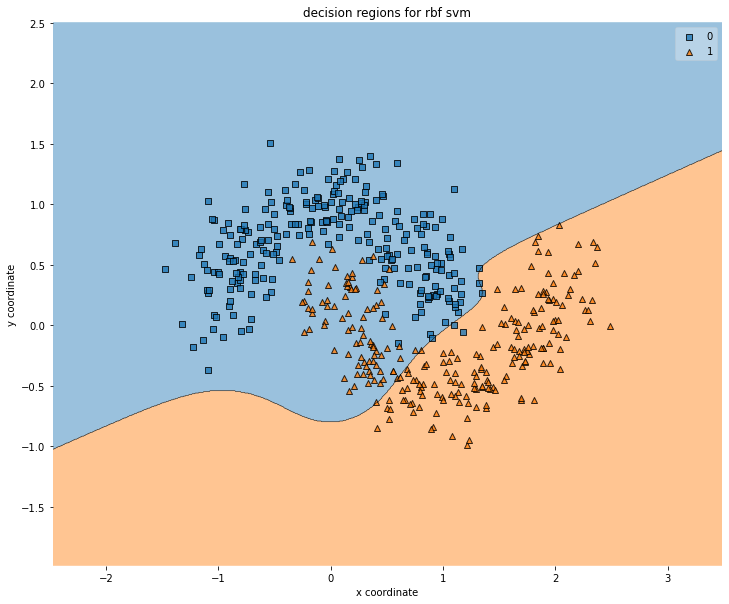

0.816

In [104]:
svm = SVC(kernel='poly', degree=7)
plot_decisions(svm, moons_points, moons_labels, "rbf svm")

svm.score(moons_points, moons_labels)

Как видно, все приближает плохо, с degree=3 получается немного лучше, чем линейная модель, поэтому можно взять ее.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

degree = 3
lr = LogisticRegression(penalty='l2', C=20)
pl = Pipeline([('transfrom', PolynomialFeatures(degree=degree)), ('model', lr)])
pl.fit(moons_points, moons_labels)

Pipeline(steps=[('transfrom', PolynomialFeatures(degree=3)),
                ('model', LogisticRegression(C=20))])

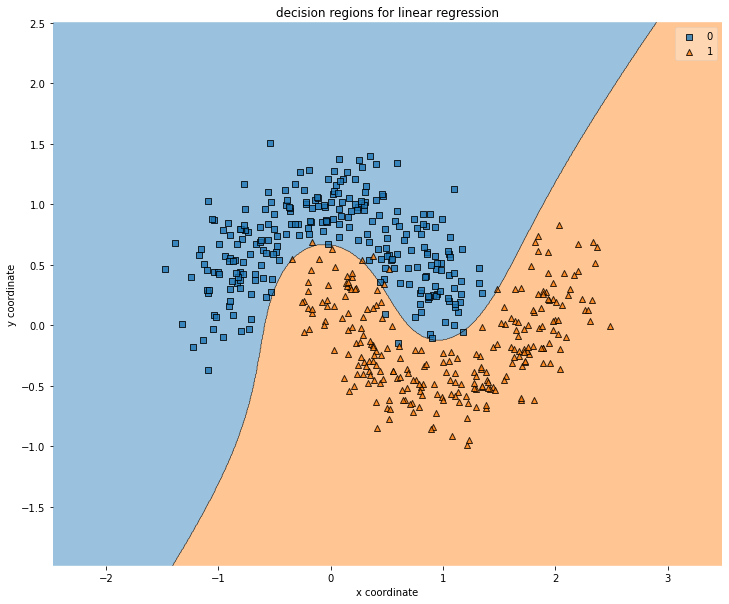

In [101]:
plot_decisions(pl, moons_points, moons_labels, "linear regression")

In [103]:
pl.score(moons_points, moons_labels)

0.98

Видно, что данная модель хорошо обучается при степени многочленов = 3. Граница похожа на гиперболу (тк степень 3), у четных степеней границей будет парабола, так что в данной задаче лучше подходит нечетная, а 3 хорошо справляется. Оптимизируется также лучше по сравнению с svm той же степени (по score видно).

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

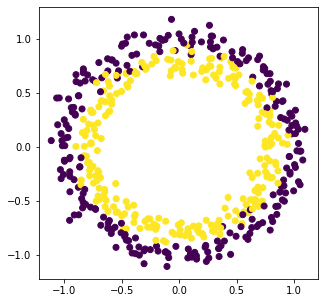

In [105]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

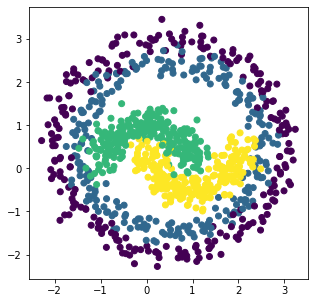

In [106]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/Users/flybot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/flybot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

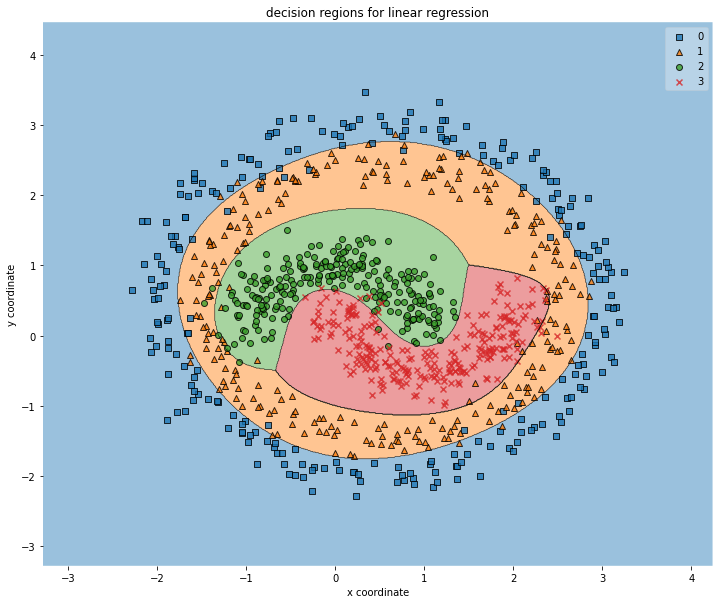

0.946

In [132]:
degree = 4
lr = LogisticRegression(C=20, max_iter=100)
pl = Pipeline([('transfrom', PolynomialFeatures(degree=degree)), ('model', lr)])
pl.fit(points, labels)

plot_decisions(pl, points, labels, "linear regression")
pl.score(points, labels)

Модель из прошлого пункта хорошо работает и на данном примере.